### Augmentation - KorQuAD

In [1]:
from datasets import load_from_disk, load_dataset, DatasetDict, Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

/data/ephemeral/home/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# train_dataset 로드하고 데이터프레임으로 변환

dataset = load_from_disk("../data/raw/train_dataset/")

train = dataset["train"]
valid = dataset["validation"]

train_df = pd.DataFrame.from_dict(data = train)
valid_df = pd.DataFrame.from_dict(data = valid)

# KorQuAD/squad_kor_v1 데이터셋 로드하고 데이터프레임 변환

korquad_data = load_dataset("KorQuAD/squad_kor_v1")

korquad_train = korquad_data["train"]
korquad_valid = korquad_data["validation"]

korquad_train_df = pd.DataFrame.from_dict(data = korquad_train)
korquad_valid_df = pd.DataFrame.from_dict(data = korquad_valid)


In [783]:
print(len(korquad_train_df))
print(len(korquad_valid_df))


60407
5774


In [3]:
train_ratio = len(train_df) / (len(train_df) + len(valid_df)) * 100
valid_ratio = 100 - train_ratio
print(f"train 데이터 비율: {train_ratio}")
print(f"valid 데이터 비율: {valid_ratio}")

train 데이터 비율: 94.27480916030534
valid 데이터 비율: 5.725190839694662


In [4]:
korquad_train_ratio = len(korquad_train_df) / (len(korquad_train_df) + len(korquad_valid_df)) * 100
korquad_valid_ratio = 100 - korquad_train_ratio
print(f"korquad_train 데이터 비율: {korquad_train_ratio}")
print(f"korquad_valid 데이터 비율: {korquad_valid_ratio}")

korquad_train 데이터 비율: 91.2754415919977
korquad_valid 데이터 비율: 8.724558408002295


In [5]:
print((train_df["context"].apply(len)).describe())
print("="*50) 
print((train_df["question"].apply(len)).describe())


count    3952.000000
mean      920.220648
std       356.500514
min       512.000000
25%       645.000000
50%       819.000000
75%      1099.250000
max      2059.000000
Name: context, dtype: float64
count    3952.000000
mean       29.322368
std         8.727421
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question, dtype: float64


In [787]:
print((valid_df["context"].apply(len)).describe())
print("="*50) 
print((valid_df["question"].apply(len)).describe())

count     240.000000
mean      916.725000
std       360.032122
min       517.000000
25%       616.750000
50%       820.500000
75%      1107.250000
max      2064.000000
Name: context, dtype: float64
count    240.000000
mean      29.195833
std        8.728301
min        9.000000
25%       23.000000
50%       29.000000
75%       35.000000
max       59.000000
Name: question, dtype: float64


In [788]:
print((korquad_train_df["context"].apply(len)).describe())
print("="*50) 
print((korquad_train_df["question"].apply(len)).describe())

count    60407.000000
mean       519.268181
std        215.609530
min        348.000000
25%        395.000000
50%        462.000000
75%        574.000000
max      10012.000000
Name: context, dtype: float64
count    60407.000000
mean        33.798815
std         12.734836
min          5.000000
25%         25.000000
50%         32.000000
75%         41.000000
max        146.000000
Name: question, dtype: float64


In [789]:
korquad_train_df.head()

,id,title,context,question,answers
0,6566495-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,"{'text': ['교향곡'], 'answer_start': [54]}"
1,6566495-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,"{'text': ['1악장'], 'answer_start': [421]}"
2,6566495-0-2,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,"{'text': ['베토벤의 교향곡 9번'], 'answer_start': [194]}"
3,6566518-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,"{'text': ['파우스트'], 'answer_start': [15]}"
4,6566518-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,"{'text': ['합창교향곡'], 'answer_start': [354]}"


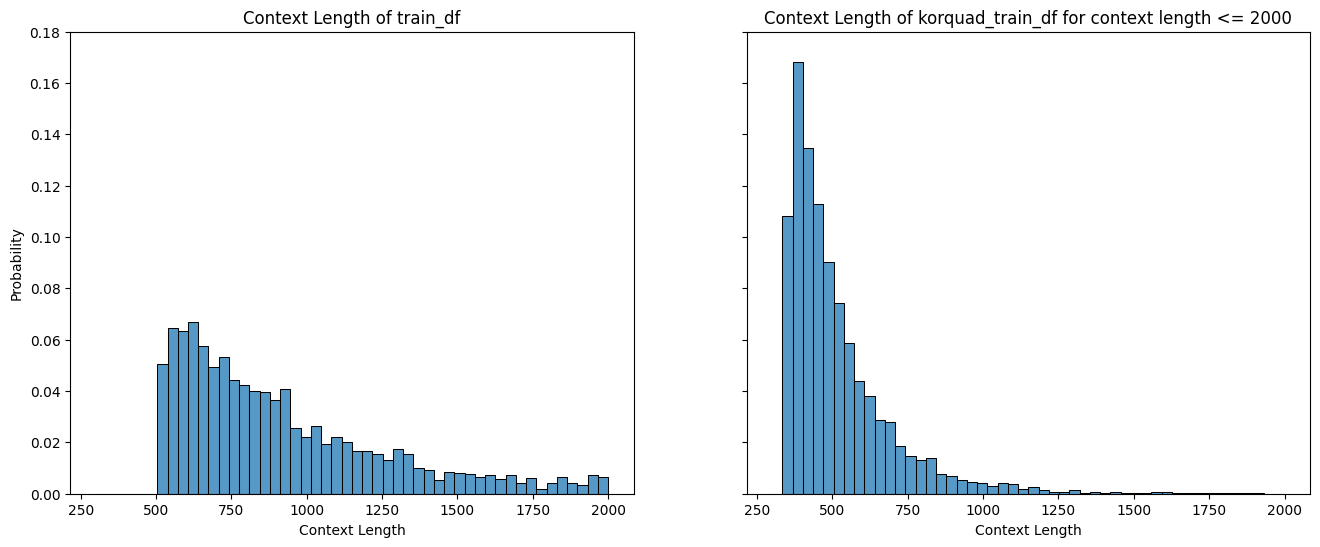

In [6]:
train_df['context_length'] = train_df['context'].apply(len)

korquad_train_df['context_length'] = korquad_train_df['context'].apply(len)
filtered_df = korquad_train_df.loc[korquad_train_df['context_length'] <= 2000]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.histplot(train_df['context_length'], bins=50, binrange=(300, 2000), stat="probability", ax=axes[0])
axes[0].set_title('Context Length of train_df')
axes[0].set_xlabel('Context Length')
axes[0].set_ylabel('Probability')
axes[0].set_ylim(0, 0.18) 


sns.histplot(filtered_df['context_length'], bins=50, binrange=(300, 2000), stat="probability", ax=axes[1])
axes[1].set_title('Context Length of korquad_train_df for context length <= 2000')
axes[1].set_xlabel('Context Length')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 0.18)  

plt.show()

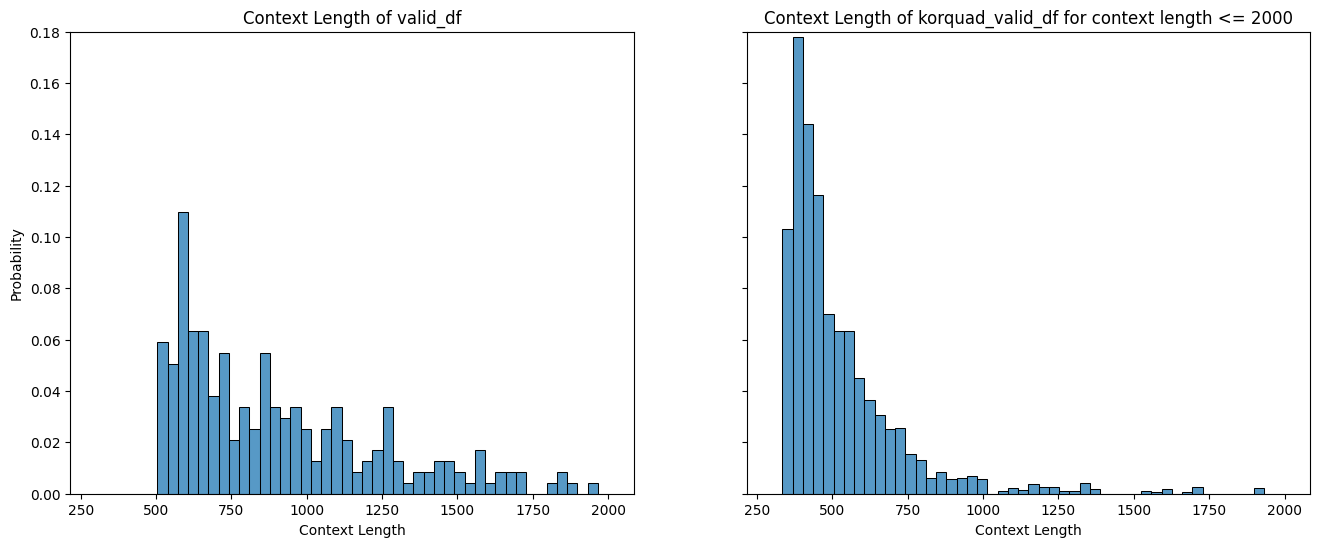

In [7]:
valid_df['context_length'] = valid_df['context'].apply(len)

korquad_valid_df['context_length'] = korquad_valid_df['context'].apply(len)
filtered_df = korquad_valid_df.loc[korquad_valid_df['context_length'] <= 2000]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.histplot(valid_df['context_length'], bins=50, binrange=(300, 2000), stat="probability", ax=axes[0])
axes[0].set_title('Context Length of valid_df')
axes[0].set_xlabel('Context Length')
axes[0].set_ylabel('Probability')
axes[0].set_ylim(0, 0.18) 


sns.histplot(filtered_df['context_length'], bins=50, binrange=(300, 2000), stat="probability", ax=axes[1])
axes[1].set_title('Context Length of korquad_valid_df for context length <= 2000')
axes[1].set_xlabel('Context Length')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 0.18)  

plt.show()

In [8]:
# 길이 필터링
korquad_train_df = korquad_train_df[korquad_train_df["context"].apply(len).between(500, 2000)]
korquad_valid_df = korquad_valid_df[korquad_valid_df["context"].apply(len).between(500, 2000)]

# context_length 컬럼 삭제
korquad_train_df = korquad_train_df.drop(columns=["context_length"])
korquad_valid_df = korquad_valid_df.drop(columns=["context_length"])

In [9]:
def find_matches(df1, df2, context_col = "context", question_col= "question"):
    matching_rows = (df1[context_col].isin(df2[context_col])) & (df1[question_col].isin(df2[question_col]))
    
    # 일치하는 행들만 추출
    common_rows = df1[matching_rows]
    
    if common_rows.empty:
        print("context와 question이 모두 겹치는 경우는 없습니다.")
    else:
        print("context와 question이 모두 겹치는 경우가 있습니다:")
        print(common_rows)

In [10]:
find_matches(korquad_train_df, valid_df)
find_matches(korquad_train_df, train_df)

find_matches(korquad_valid_df, valid_df)
find_matches(korquad_valid_df, train_df)

find_matches(korquad_train_df, korquad_valid_df)
find_matches(train_df, valid_df)

context와 question이 모두 겹치는 경우는 없습니다.
context와 question이 모두 겹치는 경우는 없습니다.
context와 question이 모두 겹치는 경우는 없습니다.
context와 question이 모두 겹치는 경우는 없습니다.
context와 question이 모두 겹치는 경우는 없습니다.
context와 question이 모두 겹치는 경우는 없습니다.


In [11]:
# drop duplicates

korquad_train_df['answers_str'] = korquad_train_df['answers'].astype(str)
korquad_valid_df['answers_str'] = korquad_valid_df['answers'].astype(str)

korquad_train_df = korquad_train_df.drop_duplicates(subset = ["context", "question", "answers_str"], keep = "first")
korquad_valid_df = korquad_valid_df.drop_duplicates(subset = ["context", "question", "answers_str"], keep = "first")

# answers_str 컬럼 삭제
korquad_train_df = korquad_train_df.drop(columns=['answers_str'])
korquad_valid_df = korquad_valid_df.drop(columns=['answers_str'])


In [796]:
train_df[~train_df["question"].str.endswith("?")]

,title,context,question,id,answers,document_id,__index_level_0__,context_length
295,피아노 협주곡 5번 (베토벤),"자신의 후견자 겸 제자인 루돌프 대공을 위해, 1809년에 프랑스 군대의 포격이 쏟...",피아니스트이자 출판업을 하는 베토벤의 친구는,mrc-1-000614,"{'answer_start': [432], 'text': ['요한 B. 크라머']}",7870,396,652
3170,댜틀로프 고개 사건,1959년 1월 28일에 이고르 댜틀로프를 중심으로 탐사대를 결성한 우랄 국립공과대...,이고르 댜틀로프가 이끄는 모임에서 가장 먼저 빠진 사람은?-,mrc-0-000045,"{'answer_start': [165], 'text': ['유리 유딘']}",35158,30,1236


In [797]:
valid_df[~valid_df["question"].str.endswith("?")]

,title,context,question,id,answers,document_id,__index_level_0__,context_length


In [12]:
no_question_mark = korquad_train_df[~korquad_train_df["question"].str.endswith("?")]
print(f"물음표로 안끝나는 케이스: {len(no_question_mark)}")
print("="*50) 
for index, row in no_question_mark.iterrows():
    print(row["question"]) 
    print("\n" + "="*50 + "\n") 

물음표로 안끝나는 케이스: 76
흥국생명시절 김연경 자신의 한 경기 최다 득점은 몇점인가


4.18 기념 마라톤이 끝나는 장소는 어디인가


지방에서 관찰사와 수령의 말단 행정은 누가 관리하였는가


옹정제는 예수회 선교사들을 어디로 추방하였습니까/


최강창민의 영화 데뷔작은 무엇인가


급진적인 사상운동이 제대로 제어되지 못할 경우 악영향을 끼치는 잘 보여주는 사례로 중국에서 일어난 사건은


급진적 공산주의 사상의 대표로 세계적으로 제국주의 문제와 노동문제에 관심을 보이게 된 것은


17대 총선에서 추미애가 민주당에서 맡은 역할은 무엇인가


자동차의 연료가 소모되면서 발생하는 오염물질 두가지를 써보시오.


5000달러 배상금을 1월 10일까지 청구하지 않으면 어떤 공격을 받을 것이라고 했나


The Boys를 작곡, 편곡한 프로듀서는 누구인가


기명후보로 등록되어 유권자의 표를 얻은 후보 중, 10만 표 이상을 득표한 후보의 이름은? (한 단어로 쓰시오.)


2017년 엘 제네리코가 WWE에게 해고당하지 않기 위해 케빈 오웬스와 태그팀으로 출전해 승리한 경기는


흑인학과 여성학은 단지 분리에만 있는 것 뿐만 아니라 무엇의 지속에도 있다


러시아가 시리아, 이란, 이라크와 전략적으로 동맹을 맺으려고 한 것은 어떤 나라에 대항하기 위해서였는가


시리아 내전에서 반군과 서구 연합군들은 누구의 퇴진을 요구하였는가


시리아 내전은 2011년 초에 누구에 대항하여 시작되었는가


1979년 이란 혁명 이후 유일하게 지속된 이란의 동맹국은 어디인가


이란은 이라크에서 미국, 이라크 정부와 연합해 누구와 맟서 싸우는가


래드클리프 야드와 가까운 곳에 있는 두 가지 건물, 시설을 말해보시오.


11월 27일에 오스트리아식 불가분성을 교서를 발표한 총리는


"You and I"와 "Marry the night"의 비디오는 어떤 평가를 받았는가


프로게이머 조용호가 2001년에 입단한 곳은


초기 로큰롤 순위에 있던 가수들을 모두 서술하시오



In [13]:
import re
for index, row in no_question_mark.iterrows():
    last_char = row["question"][-1]
    if re.match("[가-힣]", last_char):
        
        korquad_train_df.at[index, "question"] += "?"

In [14]:
# 물음표 붙인 후

no_question_mark = korquad_train_df[~korquad_train_df["question"].str.endswith("?")]
print(len(no_question_mark))

14


In [15]:
len(korquad_train_df)

23767

In [802]:
## korquad_valid_df
no_question_mark = korquad_valid_df[~korquad_valid_df["question"].str.endswith("?")]
print(f"물음표로 안끝나는 케이스: {len(no_question_mark)}")
print("="*50) 
for index, row in no_question_mark.iterrows():
    print(row["question"]) 
    print("\n" + "="*50 + "\n") 

물음표로 안끝나는 케이스: 0


In [803]:
korquad_train_df.head()

,id,title,context,question,answers
0,6566495-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,"{'text': ['교향곡'], 'answer_start': [54]}"
1,6566495-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,"{'text': ['1악장'], 'answer_start': [421]}"
2,6566495-0-2,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,"{'text': ['베토벤의 교향곡 9번'], 'answer_start': [194]}"
3,6566518-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,"{'text': ['파우스트'], 'answer_start': [15]}"
4,6566518-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,"{'text': ['합창교향곡'], 'answer_start': [354]}"


In [16]:
unwanted_rows = korquad_train_df[~korquad_train_df["question"].str.match(r'^[가-힣a-zA-Z0-9?.\s\'\"<>]', na=False)]

for index, row in unwanted_rows.iterrows():
    print(row["question"]) 
    print("\n" + "="*50 + "\n") 

(주)대구시민프로축구단이 24일간 1차 시민주 공모를 실시해 확보한 자금은?


(주)인터내셔널이스포츠그룹이 이네이쳐 탑 팀을 인수해 창단된 팀의 이름은?


‘쿨란의 사냥개’라는 뜻으로 붙여진 세탄타의 이름은?


《고 에다》에서 바프스루드니르가 말하기를 39절에 나오는 표현 중 라그나로크를 가리키는 표현은 무엇인가?


《고 에다》에서 바프스루드니르가 말하기를 에서 "타 에르 르겐 데위야" 라는 문장이 나오는 절은 몇 절인가?


〈착한 건 나쁜 게 아니야 pt.1〉에서 권석정은 길게 끄는 부분이 어떤 가수의 피아노를 연상시킨다고 말했는가?


《어드벤처 타임》이 처음 시작했을 때의 영상 구성은?


《어드벤처 타임》정식 시리즈로 제작된 첫 에피소드는?


〈What Have you Done〉의 제작 번호는?




In [17]:
unwanted_rows = korquad_valid_df[~korquad_valid_df["question"].str.match(r'^[가-힣a-zA-Z0-9?.\s\'\"<>]', na=False)]
len(unwanted_rows)


0

In [18]:
def save_df_as_datasetdict(train_df, valid_df, save_path="../data/external/korquad"):
    train = Dataset.from_pandas(train_df)
    validation = Dataset.from_pandas(valid_df)
    dataset = DatasetDict({"train": train, "validation": validation})
    dataset.save_to_disk(save_path)
    os.system(f"sudo chmod -R 777 {save_path}")
    
save_df_as_datasetdict(korquad_train_df, korquad_valid_df)

Saving the dataset (1/1 shards): 100%|██████████| 2266/2266 [00:00<00:00, 255005.04 examples/s]


In [19]:
print(len(korquad_train_df))
print(len(korquad_valid_df))

23767
2266
